Final Project- swimming

This project uses dataset from usaswimming data :(include here link)
my hypothesis is:


In [ ]:
#connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image, display

datadir = '/content/drive/MyDrive/DataVis/Final_project/'

Mounted at /content/drive


Import important libraries

In [ ]:
renderer = None

def show(fig):
  fig.show(renderer=renderer)

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import calendar
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# read CSV datafile into a pandas dataframe

filename = 'top_swimmers.csv'
full_filename = datadir + filename
df = pd.read_csv(full_filename)

In [ ]:
# print head and size of df
print(df.head(5))
print(len(df))
# view the columns
df.columns

          FullName  Distance      Event  SwimmerAge  \
0   Crooks, Jordan        50  50 FR SCY          21   
1     Liendo, Josh        50  50 FR SCY          21   
2      Alexy, Jack        50  50 FR SCY          21   
3  Guiliano, Chris        50  50 FR SCY          20   
4  Seeliger, Bjorn        50  50 FR SCY          24   

   EventCompetitionCategoryKey SwimTime SwimTimeAdj  \
0                            2    17.99       17.99   
1                            2    18.07       18.07   
2                            2    18.38       18.38   
3                            2    18.43       18.43   
4                            2    18.54       18.54   

                      Standard                                  MeetName  \
0  2024 Summer Nationals (LCM)       2024 Southeastern Conference Champs   
1  2024 Summer Nationals (LCM)  2024 NCAA Division I Men's Championships   
2  2024 Summer Nationals (LCM)  2024 NCAA Division I Men's Championships   
3  2024 Summer Nationals (LCM)  20

Index(['FullName', 'Distance', 'Event', 'SwimmerAge',
       'EventCompetitionCategoryKey', 'SwimTime', 'SwimTimeAdj', 'Standard',
       'MeetName', 'SwimDate', 'ClubName', 'LscCode', 'IsForeign', 'Rank',
       'PowerPoints', 'Sanctioned'],
      dtype='object')

Organizing data- finding the swim date year and month to be able to analys later

In [ ]:
df['SwimDate'] = pd.to_datetime(df['SwimDate'], format='%m/%d/%Y')
d = df['SwimDate'][1]
print(d)
# add new columns to frame
df['SwimYear'] = df['SwimDate'].apply(lambda date: date.year)
df['SwimMonth'] = df['SwimDate'].apply(lambda date: calendar.month_abbr[date.month])
#printing all new columns
cols = list(df.columns)
cols


2024-03-28 00:00:00


['FullName',
 'Distance',
 'Event',
 'SwimmerAge',
 'EventCompetitionCategoryKey',
 'SwimTime',
 'SwimTimeAdj',
 'Standard',
 'MeetName',
 'SwimDate',
 'ClubName',
 'LscCode',
 'IsForeign',
 'Rank',
 'PowerPoints',
 'Sanctioned',
 'SwimYear',
 'SwimMonth']

In [ ]:
# Function to convert time string to total seconds
def convert_time_to_seconds(time_str):
    if ':' in time_str:  # Check if the time string contains minutes
        minutes, seconds = time_str.split(':')
        return float(minutes) * 60 + float(seconds)
    else:
        return float(time_str)


# Apply the function to the SwimTime column
df['SwimTimeSec'] = df['SwimTime'].apply(convert_time_to_seconds)


# **The main part- AGE analysis:**

1. def analyze_age_performance(df):- this function shows the rank and power distributions compare to age, my hypothesis =more younger swimmers (under 18) achieve higher ranks however older swimmers have more power points compared in the same event
2. average_swim_time_by_age_event(df)-

In [ ]:
def analyze_age_performance(df):
    df['AgeGroup'] = df['SwimmerAge'].apply(lambda x: 'Under 18' if x < 18 else ('18 to 21' if x <= 21 else '22 and above'))
    category_order = ['Under 18', '18 to 21', '22 and above']
    # Create box plot for Rank
    fig = px.box(df, x='AgeGroup', y='Rank', color='AgeGroup',
                 title='Rank Distribution by Age Group',
                 category_orders={'AgeGroup': category_order})
    fig.update_layout(xaxis_title='Age Group', yaxis_title='Rank')
    fig.show()

    # Create box plot for Power Points
    fig = px.box(df, x='AgeGroup', y='PowerPoints', color='AgeGroup',
                 title='Power Points Distribution by Age Group',
                 category_orders={'AgeGroup': category_order})
    fig.update_layout(xaxis_title='Age Group', yaxis_title='Power Points')
    fig.show()


analyze_age_performance(df)


**Disscosion about the graphs:**
The box plots show the distribution of ranks and power points across different age groups. From these plots, we can observe if younger swimmers indeed achieve higher ranks and if older swimmers accumulate more power points.

In [ ]:
def average_swim_time_by_age_event(df):
    # Ensure that we are working with the original DataFrame
    df = df.copy()

    # Convert 'SwimTimeAdj' to numeric, coercing errors to NaN
    df.loc[:, 'SwimTimeAdj'] = pd.to_numeric(df['SwimTimeAdj'], errors='coerce')

    # Drop rows with NaN values in 'SwimTimeAdj'
    df = df.dropna(subset=['SwimTimeAdj'])

    # Create 'AgeGroup' column
    df.loc[:, 'AgeGroup'] = df['SwimmerAge'].apply(lambda x: 'Under 18' if x < 18 else ('18 to 21' if x <= 21 else '22 and above'))
    category_order = ['Under 18', '18 to 21', '22 and above']

    # Group by 'AgeGroup' and 'Event' to calculate the average 'SwimTimeAdj'
    avg_swim_time = df.groupby(['AgeGroup', 'Event'])['SwimTimeAdj'].mean().reset_index()

    # Create a bar plot for average swim time by age group and event
    fig = px.bar(avg_swim_time, x='Event', y='SwimTimeAdj', color='AgeGroup',
                 title='Average Swim Time by Age Group and Event',
                 barmode='group', category_orders={'AgeGroup': category_order})
    fig.update_layout(xaxis_title='Event', yaxis_title='Average Swim Time (s)')
    fig.show()

average_swim_time_by_age_event(df)


**Discussion:**

The bar plot illustrates the average swim times for different age groups across various events (50 and 100 distances). This helps identify if certain age groups excel in specific events. Generally, we can see that the average times are quite close, but the group aged 22 and above is slightly faster, except in the 100 freestyle SCY, likely due to the end of their college careers.


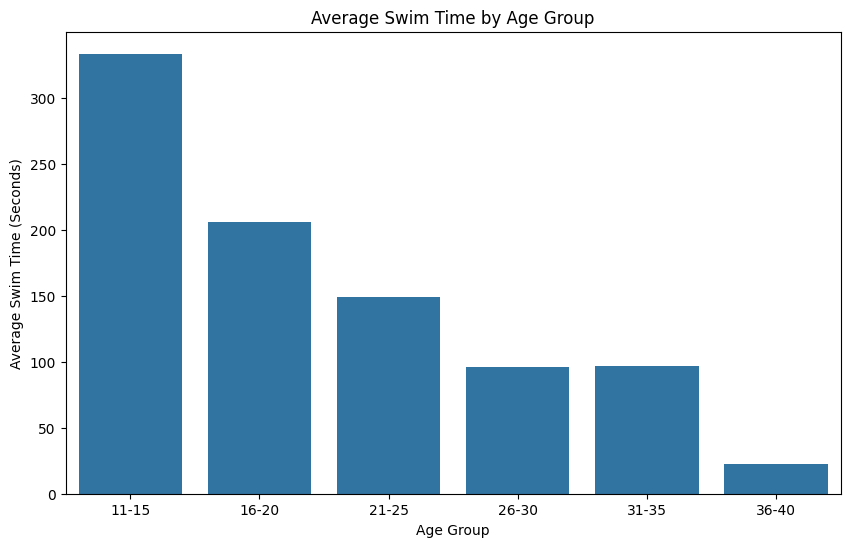

In [ ]:
def age_groups(df):
# Create age groups
  age_groups = pd.cut(df['SwimmerAge'], bins=[ 10, 15, 20, 25, 30, 35, 40], labels=[ '11-15', '16-20', '21-25', '26-30', '31-35', '36-40'])
  df['AgeGroup'] = age_groups

  # Calculate average swim time by age group
  avg_swim_time_by_age_group = df.groupby('AgeGroup')['SwimTimeSec'].mean().reset_index()

  # Plotting the bar graph
  plt.figure(figsize=(10, 6))
  sns.barplot(x='AgeGroup', y='SwimTimeSec', data=avg_swim_time_by_age_group)
  plt.title('Average Swim Time by Age Group')
  plt.xlabel('Age Group')
  plt.ylabel('Average Swim Time (Seconds)')
  plt.show()

age_groups(df)


**Discussion:**
This bar graph is clearly illustrates how physiological factors and training intensity influence athletic performance in swimming across different age groups.
The younger swimmers (11-15) are still developing, which is reflected in their slower times. Peak performance is seen in the 21-25 age group, where physical maturity and possibly greater training intensity contribute to faster times. As athletes age (26-30), a gradual increase in times suggests a decline in physical peak, although experience and technique allow them to maintain relatively competitive times.
The older swimmers also swims shorther distance as we can see 36-40 avrage time is under 50 seconds meaning they swim 50 or 100.

It beneficial for coaches and athletes to set realistic goal, and fit age specific training.

In [ ]:
def analyze_event_popularity(df):
    # Calculate the median swim time for each event and sort events by this median
    sorted_events = df.groupby('Event')['SwimTimeSec'].median().sort_values().index.tolist()

    # Ensure the DataFrame 'Event' column is categorical with sorted order
    df['Event'] = pd.Categorical(df['Event'], categories=sorted_events, ordered=True)

    # Create the box plot with events ordered by median swim time
    fig = px.box(
        df, x='Event', y='SwimTimeSec', color='Event',
        title='Swim Time Distribution by Event',
        labels={"SwimTime": "Swim Time (s)", "Event": "Event"}
    )

    # Calculate required width dynamically based on the number of events
    num_events = df['Event'].nunique()
    plot_width = max(1500, num_events * 20)  # Adjust width as needed

    # Update layout for better visibility and interaction
    fig.update_layout(
        xaxis_title='Event',
        yaxis_title='Swim Time (s)',
        xaxis={'categoryorder': 'array', 'categoryarray': sorted_events},
        width=plot_width,  # Use dynamic width
        hovermode='closest',  # Enhance tooltip interaction
        xaxis_tickangle=-45  # Rotate x-axis labels for better readability
    )

    fig.show()

analyze_event_popularity(df)


**Discussion:**

The plot displaying swim time distribution by event reveals clear patterns in competitive swimming across various distances and styles.

Shorter events like the 50m freestyle show tightly clustered times, indicating high competition levels where slight improvements can significantly alter rankings. In contrast, longer endurance events such as the 1500m and 1650m freestyle demonstrate broader time distributions, highlighting varying swimmer endurance.

Additionally, stroke-specific events like butterfly and breaststroke exhibit wider time spreads even at shorter distances due to the technical complexity of these strokes. The plot also compares performances between short course yards (SCY) and long course meters (LCM), with SCY times generally being faster because of the advantage gained from more frequent turns, emphasizing the influence of pool type on swim times. This comprehensive visualization serves as a useful tool for analyzing performance trends, helping coaches and swimmers strategize training and competition approaches effectively.


Showing the power points vs age- consistitly

In [29]:

def plot_Parameter_vs_age(df,coulmn_pick='SwimTime', selected_event = '50 FR SCY',mode='lines', age_column='SwimmerAge'):
    """
    Create a scatter plot for each event, showing the relationship between swim time and age.
    """
    # Filter data for the selected event
    event_data = df[df['Event'] == selected_event]

    # Get the top 100 swimmers for the selected event
    top_swimmers = event_data.nlargest(100, coulmn_pick)

    # Create a scatter plot for the selected event
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=top_swimmers[age_column], y=top_swimmers[coulmn_pick], mode=mode, name=f'{coulmn_pick}'))
    fig.update_layout(title=f'{selected_event} - Age vs. {coulmn_pick}', xaxis_title='Age', yaxis_title=f'{coulmn_pick}')
    fig.show()


plot_Parameter_vs_age(df,'SwimTimeSec','100 BK SCY','markers')
plot_Parameter_vs_age(df,'PowerPoints','100 BK SCY')
plot_Parameter_vs_age(df,'Rank','100 BK SCY')





**Discussion:**

The plots analyzing the 100m backstroke short course yards (100 BK SCY) event illustrate the relationship between age and swim performance metrics such as Swim Time, PowerPoints, and Rank.

Key observations indicate that swimmers aged 18 to 24 demonstrate peak performance, particularly noticeable in faster swim times and higher PowerPoints, suggesting optimal physical capabilities and intensive training during these years.
As age increases, there's noticeable variability in performance, although older swimmers maintain competitive efficiency, likely due to accumulated experience. These insights are crucial for developing age-specific training strategies and setting realistic performance expectations in competitive swimming.

# ***This is my second part- comparing foreign and local swimmers***

This function create two graphes, one counts the foreign and local swimmers- my opinion more local swimmers will be ranked,

The second graph is the power ranking box to show the relation between a foregin swimmer to their ranking chances.

In [ ]:
def analyze_foreign_swimmers(df):
    # Count the number of foreign vs local swimmers
    foreign_counts = df['IsForeign'].value_counts().reset_index()
    foreign_counts.columns = ['IsForeign', 'Count']

    # Create a bar chart for the count of foreign vs local swimmers
    fig = px.bar(foreign_counts, x='IsForeign', y='Count', color='IsForeign', title='Count of Foreign vs Local Swimmers')
    fig.update_layout(xaxis_title='Is Foreign', yaxis_title='Count')
    fig.show()




analyze_foreign_swimmers(df)


**Discussion:**

This bar chart compares the number of foreign and local swimmers, giving insights into their representation in the dataset.As we can assume since it is dataset from USASWIMMING and have yards distances in it which preform just in the USA, most people will be local and not foreign.



# ***This is my Third part- month/ ranking***

This function counts and check how many people enterthe lists in each month.
Logically, I believe it will be march since the NCAA college competition is in March.

In [ ]:
#include all of the months
def analyze_seasonal_performance_by_rank(df):
    # Ensure 'SwimMonth' is in the correct order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df['SwimMonth'] = pd.Categorical(df['SwimMonth'], categories=month_order, ordered=True)

    # Group by month and count the number of unique swimmers entering the lists
    monthly_counts = df.groupby('SwimMonth')['FullName'].count().reset_index()
    monthly_counts.columns = ['Month', 'Count']

    # Create a bar chart to visualize the number of swimmers entering the lists each month
    fig = px.bar(monthly_counts, x='Month', y='Count', color='Month', title='Number of Swimmers Entering the Lists by Month')
    fig.update_layout(xaxis_title='Month', yaxis_title='Number of Swimmers')
    fig.show()



analyze_seasonal_performance_by_rank(df)

**Discussion:**
The bar char display the monthly distribution of swimmers entering the top 100 list,revealing key seasonal trends in swimmer registrations or competitive activity. March shows the highest number of swimmers entering, likely due to main competition such as NCAA.
This visualization effectively highlights when swimmers are most actively competing or registering for performance.

# **MAP Entries**


1.   swimmer_distribution_map(df, year)- this function is representing the amount of swimmers that got into the list in the year choose
2.   swimmer_distribution_map2(df)- this function is representing the amount of swimmers that got into the list over the years



In [ ]:
def swimmer_distribution_map(df, year):
    # Filter the DataFrame for the specified year and top 100 swimmers
    df_year = df[df['SwimYear'] == year].nlargest(100, 'Rank')

    # Aggregate the count of swimmers by state
    swimmer_counts = df_year.groupby('LscCode').size().reset_index(name='SwimmerCount')

    # Create the scatter geo plot for USA
    fig = px.scatter_geo(swimmer_counts,
                         locations="LscCode",
                         locationmode="USA-states",
                         size="SwimmerCount",
                         hover_name="LscCode",
                         color="SwimmerCount",
                         projection="albers usa",
                         color_continuous_scale=px.colors.sequential.Turbo,
                         title=f'Top 100 Swimmers Distribution by State in {year}',
                         size_max=50)

    fig.update_layout(geo=dict(scope='usa'))
    fig.show()


def swimmer_distribution_map2(df):
    # Filter the DataFrame for the specified year and top 100 swimmers


    # Aggregate the count of swimmers by state
    swimmer_counts = df.groupby('LscCode').size().reset_index(name='SwimmerCount')

    # Create the scatter geo plot for USA
    fig = px.scatter_geo(swimmer_counts,
                         locations="LscCode",
                         locationmode="USA-states",
                         size="SwimmerCount",
                         hover_name="LscCode",
                         color="SwimmerCount",
                         projection="albers usa",
                         color_continuous_scale=px.colors.sequential.Turbo,
                         title=f'Top 100 Swimmers Distribution by State',
                         size_max=50)

    fig.update_layout(geo=dict(scope='usa'))
    fig.show()



#calling functions
swimmer_distribution_map(df, 2023)

swimmer_distribution_map2(df)


**Discussion:**

In the visualization we can see a geographical of the different states distribution of the top swimmers.
The first graph shows for the year 2023 while the second graph shows for overall showing where competitive swimming talent is most concentrated.

---

 States with larger bubbles represent a higher count of top-ranked swimmers, indicating regional strength.
 For example, states like California and Florida, known for their robust swimming communities and year-round training conditions, likely show larger concentrations of top swimmers.

This geographic analysis helps in understanding how local factors, such as climate, coaching quality, and facility availability, might influence the development of elite swimmers. Additionally, the distribution could reflect the location of major swim clubs and colleges that are known for producing competitive athletes. This kind of mapping is valuable for stakeholders in the swimming community, including coaches, event organizers, and sports analysts, as it helps in targeting developmental programs and investments to foster swimming talent in areas with less representation.


# **Club analysis data-**

this part has 3 functions


1.   top_clubs_point(df)- this function find the top 20 clubs based on the top individuale in the club(witht he most powerpoints)
2.   top_avg_clubs_points(df)- this function find the top 20 clubs based on the avg of powerpoint swimmer(checking between the swimmers inb the top 100)
3. top_avg_clubs_count(df) - this function count the amount of swimmers in the top 100 in each event and show the top 20 clubs



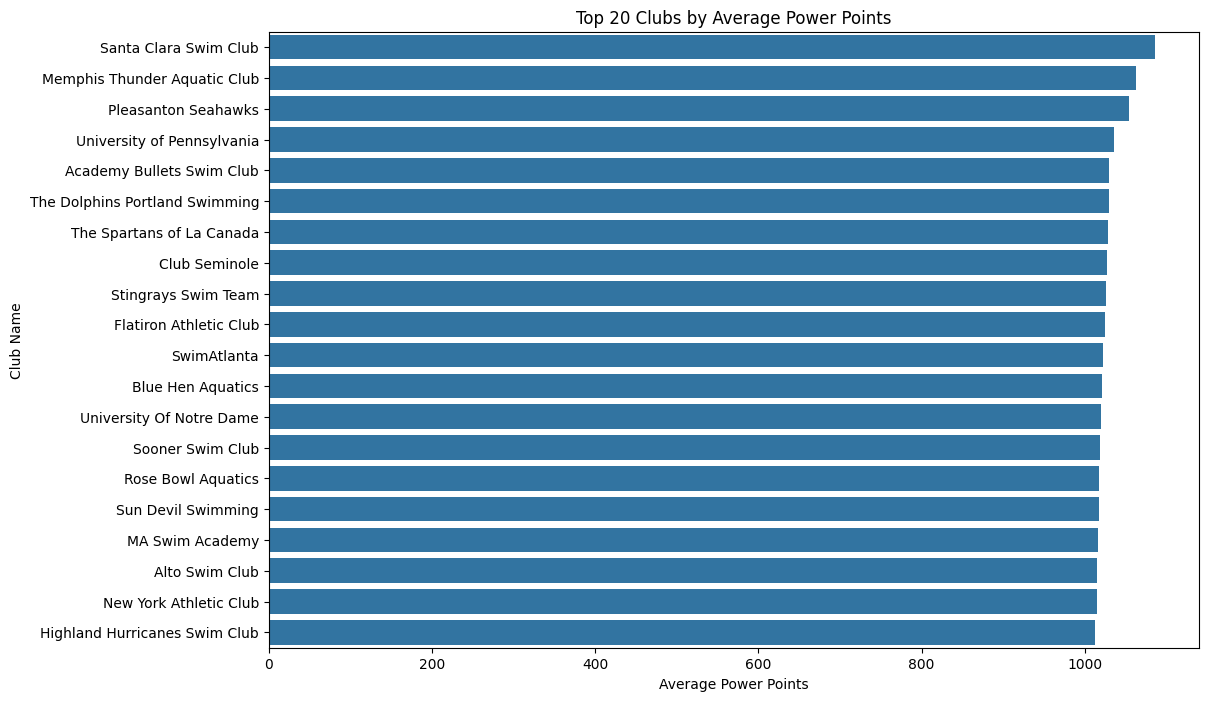

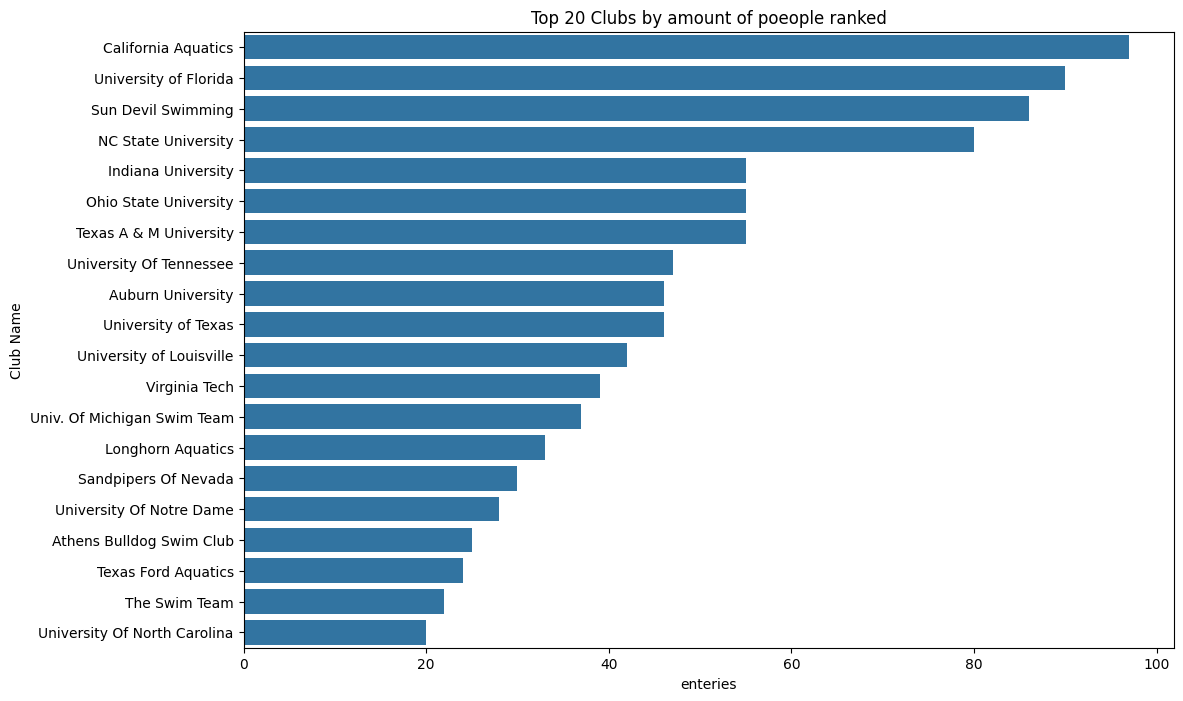

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [34]:
# Limit the data to the top 20 clubs based on the top power point of a swimmer under the club
def top_avg_clubs_points(df):
  top_clubs = df.groupby('ClubName')['PowerPoints'].mean().reset_index().sort_values(by='PowerPoints', ascending=False).head(20)
  # Plotting the bar graph for the top 20 clubs
  plt.figure(figsize=(12, 8))
  sns.barplot(x='PowerPoints', y='ClubName', data=top_clubs)
  plt.title('Top 20 Clubs by Average Power Points')
  plt.xlabel('Average Power Points')
  plt.ylabel('Club Name')
  plt.show()
  return plt


# this function gets the club points and
#retrun and show the 20 clubs with the most enteries to the top 100 and their avg power points
def top_avg_clubs_count(df):
  # Filter out entries where ClubName is "unmatched"
  df1 = df[df['ClubName'] != 'Unattached']
  # # Apply the function to the SwimTime column so it will create a time in seconds
  # df1['SwimTimeSec'] = df1['SwimTime'].apply(time_to_seconds)
  # Find the top 20 clubs with the most entries
  top_clubs_by_entries = df1['ClubName'].value_counts().head(20).index
  # Filter the dataframe to include only these top 20 clubs
  top_clubs_df = df1[df1['ClubName'].isin(top_clubs_by_entries)]
  # Count the number of entries for each of the top 20 clubs
  entry_counts_by_top_clubs = top_clubs_df['ClubName'].value_counts().reset_index()
  entry_counts_by_top_clubs.columns = ['ClubName', 'Entries']

  # Sort by number of entries in decreasing order
  entry_counts_by_top_clubs = entry_counts_by_top_clubs.sort_values(by='Entries', ascending=False)

  # Plotting the bar graph for the top 20 clubs by number of entries
  plt.figure(figsize=(12, 8))
  sns.barplot(x='Entries', y='ClubName', data=entry_counts_by_top_clubs)
  plt.title('Top 20 Clubs by amount of poeople ranked')
  plt.xlabel('enteries')
  plt.ylabel('Club Name')
  plt.show()
  return plt


top_avg_clubs_points(df)
top_avg_clubs_count(df)

###**Discussion:**
there are two graphs.


---
The first graph "Top 20 Clubs by Average Power Points" shows a comparative visualization of swim clubs based on the average power points of their swimmers.
Each bar represents a different swim club, with the length of the bar indicating the average power points accumulated by its swimmers. The clubs are ranked from highest to lowest based on their average scores, making it easy to identify the clubs with the highest performing swimmers.

This visualization is particularly useful for gauging the overall competitive strength of each club, reflecting not only the skill levels of individual swimmers but also the effectiveness of the club's training programs and facilities.


---

the "Top 20 Clubs by Amount of People Ranked" graph shifts focus to the sheer volume of top-ranked swimmers from each club, reflecting on the club’s ability to cultivate a large pool of competitive swimmers. This measure can be indicative of the club’s size, resources, or the effectiveness of its recruitment and training programs. Clubs such as California Aquatics and University of Florida stand out, highlighting their prominence and scale within the swimming community.

